<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: machine learning practice with scikit-learn

---

We are going to use datasets about wine.

There are two datasets; one for white wines, one for red wines.

For information about the dataset look here:

- [https://archive.ics.uci.edu/ml/datasets/wine+quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- [Data description](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)

# Part 1: Regression

We will focus on **white wines only** for this part.

We will attempt to predict white wine (perceived) **quality** using information about the wine.

#### 1: Read in the white wine data and perform exploratory data analysis on it. Be sure to look for things like:

- missing values
- strange values
- relationships between features and the target (quality)

If you have trouble reading the file in, a good idea is to open it in a simple text editor to investigate its formatting!

In [1]:
import pandas as pd
import numpy as np

df_white = pd.read_csv("data/winequality-white.csv", sep=";")

df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df_white.shape

(4898, 12)

In [3]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


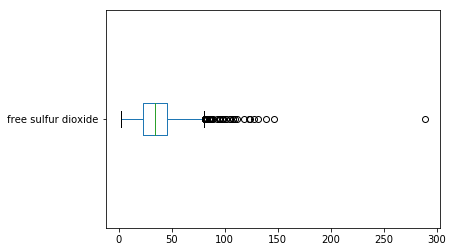

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

df_white["free sulfur dioxide"].plot.box(vert=False);

There's one outlier in this dimension - is it an outlier in others?

In [7]:
df_white[df_white["free sulfur dioxide"] == 289]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


It's on the high end of both sulphur dioxide measures and pH, but all other variables are within range so without domain knowledge it's hard to say it's not a valid wine!

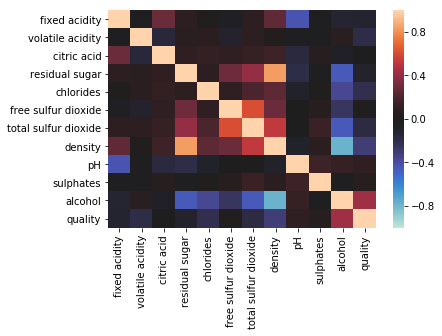

In [8]:
import seaborn as sns

sns.heatmap(df_white.corr(), vmin=-1, vmax=1, center=0);

Looks like the amount of alcohol is correlated with quality!

There's something in the relationship between density, sugar and quality too.

#### 2: Do a train-test split and choose 3 predictors to predict quality

Remember: we want to avoid testing on the final test set until the end.

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = df_white.drop("quality", axis=1)
y = df_white["quality"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

print(len(X_train), len(X_test))

3428 1470


#### 3: Now do *another* train-test split using the training set above.

We do this to simulate a train-test split so we can evaluate a model, **without** touching the test set we created in step 2.

We often call this second test set (the one it's OK to test on) the "validation" set.

In [10]:
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
print(len(X_train_2), len(X_val), len(X_test))

2056 1372 1470


#### 3: Fit a linear regression on the training set and examine your interecept and coefficients. What do they tell you?

In [11]:
model = LinearRegression()

model.fit(X_train_2[["alcohol", "density", "residual sugar"]],
          y_train_2)

print(model.intercept_, [float(c) for c in model.coef_]) # turn to float to avoid scientific notation

69.01680876502631 [0.28296508222403965, -66.81215284350769, 0.047227707175414316]


For a wine with 0 alcohol, 0 density and 0 sugar (obviously not a plausible case) we get a 69 quality wine.

Alcohol increases quality by around 0.3, density reduces it by 66, and sugar adds 0.05.

These coefficients are obviously related to the strange scale that the variables are on (e.g. density doesn't go much above 1, so it never actually reduces that 69 baseline by more than ~66, so this just says poor quality wines have a higher density).

#### 4: How well does your model do? Calculate the RMSE on the validation set.

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_val[["alcohol", "density", "residual sugar"]])
np.sqrt(mean_squared_error(y_val, y_pred))

0.8066013809591156

#### 5: Obtain the average RMSE score across 10 folds of cross-validation. This should give you a better idea of your model's performance on new data. How does it compare to the RMSE calculated above?

In [13]:
scores = cross_val_score(LinearRegression(),
                         X_train[["alcohol", "density", "residual sugar"]],
                         y_train,
                         scoring="neg_mean_squared_error",
                         cv=10)
print(np.sqrt(-scores))

[0.79421373 0.72798686 0.87806725 0.77416358 0.76607046 0.81394414
 0.77224721 0.806698   0.79391427 0.81117327]


So on average we're 3/4 a quality point out. Not terrible, but not great!

#### 6: Now try using *all the features* with both a lasso and ridge regression. Obtain the best alpha values using grid search.

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge_grid = GridSearchCV(estimator=Ridge(),
                          param_grid={'alpha': np.logspace(-10, 10, 21)},
                          scoring='neg_mean_squared_error',
                          cv=10)

lasso_grid = GridSearchCV(estimator=Lasso(),
                          param_grid={'alpha': np.logspace(-10, 10, 21)},
                          scoring='neg_mean_squared_error',
                          cv=10)

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [15]:
print(ridge_grid.best_params_, np.sqrt(-ridge_grid.best_score_))
print(lasso_grid.best_params_, np.sqrt(-lasso_grid.best_score_))

{'alpha': 0.001} 0.7578263269953204
{'alpha': 1e-05} 0.7582487099086368


In [16]:
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

ridge_coefficients = [float(c) for c in best_ridge.coef_]
lasso_coefficients = [float(c) for c in best_lasso.coef_]

print("Ridge:")
print("Intercept:",best_ridge.intercept_)
for z in zip(X_train.columns, ridge_coefficients):
    print(z)

print("Lasso\n")
print("Intercept:",best_lasso.intercept_)
for z in zip(X_train.columns, lasso_coefficients):
    print(z)

Ridge:
Intercept: 72.97189728624507
('fixed acidity', 0.005841391924432364)
('volatile acidity', -1.975315811758176)
('citric acid', -0.10532699959856562)
('residual sugar', 0.05230111031159422)
('chlorides', -0.004495900164477187)
('free sulfur dioxide', 0.005056396298305956)
('total sulfur dioxide', -0.0003929062335720586)
('density', -72.20098986999926)
('pH', 0.43588061041457177)
('sulphates', 0.6054333180795789)
('alcohol', 0.2920477318427556)
Lasso

Intercept: 103.23629106266664
('fixed acidity', 0.029883981902878345)
('volatile acidity', -1.949069858997499)
('citric acid', -0.09336741088187984)
('residual sugar', 0.06392228832815221)
('chlorides', 0.12032175846030214)
('free sulfur dioxide', 0.0048327180711429454)
('total sulfur dioxide', -0.0002767908867172969)
('density', -102.92033726888076)
('pH', 0.5450407859339947)
('sulphates', 0.649501224467029)
('alcohol', 0.2575817737610747)


#### 7: What are your conclusions based on the models you've fit above?

The dataset is still quite small with few columns, so regularisation hasn't helped much.

Some coefficients, like "free sulfur dioxide" and "total sulfur dioxide" don't seem to contribute to the model.

### 8: Bonus - compare your findings to another regression model

Use the same 3 features you chose above, and try one of: KNN, a decision tree, a random forest, or something completely different!

**8.1:** first, get the cross-validated RMSE of your other model

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn_scores = cross_val_score(knn,
                             X_train[["alcohol", "density", "residual sugar"]],
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)
print(np.sqrt(-knn_scores))

[0.79046799 0.73781649 0.83857438 0.74879884 0.83732184 0.8477719
 0.81630612 0.82292233 0.80944714 0.79751075]


Roughly the same performance actually!

**8.2:** now, test both models on your **test** set (which you shouldn't have touched until now!) and compare the two models' "real world" performance

In [18]:
y_pred_linear = model.predict(X_test[["alcohol", "density", "residual sugar"]])

# re-train because "cross_val_score" doesn't do this
knn = KNeighborsRegressor()
knn.fit(X_train[["alcohol", "density", "residual sugar"]], y_train)

y_pred_knn = knn.predict(X_test[["alcohol", "density", "residual sugar"]])

print("RMSE for linear regression: {0}\nRMSE for KNN: {1}".format(np.sqrt(mean_squared_error(y_test, y_pred_linear)),
                                                                  np.sqrt(mean_squared_error(y_test, y_pred_knn))))

RMSE for linear regression: 0.7711496922164359
RMSE for KNN: 0.7862768548781064


Our linear model was slightly better in the "real world"